# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> AYU IMAS SUSANTI <span style="color: #000000"> <br>UJIAN PRAKTIK DATA SCIENCE</span></b><br><span style="color: #FF5C8A; font-size: 24px">FIBONACCI </span></h1>
<hr>

<h3 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> LATAR BELAKANG <span style="color: #000000">

Harga saham selalu berfluktuatif akibat adanya faktor ekonomi yang bervariasi seperti inflasi dan indeks harga konsumen. 

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> RUMUSAN MASALAH <span style="color: #000000">

Bagaimana prediksi saham dari PT Telkom Indonesia dengan menggunakan metode ARIMA

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> VARIABEL DATA <span style="color: #000000">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

### Import Dataset

In [2]:
data = pd.read_csv("TLKM.JK.csv")

### Reading Dataset

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


### Eksplorasi Data

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.isnull().sum()/len(data)

Date         0.000000
Open         0.000703
High         0.000703
Low          0.000703
Close        0.000703
Adj Close    0.000703
Volume       0.000703
dtype: float64

In [6]:
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [7]:
print(data.dtypes)

Date     object
High    float64
dtype: object


In [8]:
data

,Date,High
0,2017-01-02,3980.0
1,2017-01-03,3990.0
2,2017-01-04,3980.0
3,2017-01-05,4030.0
4,2017-01-06,4010.0
...,...,...
1417,2022-08-26,4540.0
1418,2022-08-29,4550.0
1419,2022-08-30,4620.0
1420,2022-08-31,4600.0


In [9]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [10]:
data

,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


### Menghapus Nilai Null

In [11]:
data.isnull().sum()

High    1
dtype: int64

In [12]:
data = data.dropna()
print(data)

              High
Date              
2017-01-02  3980.0
2017-01-03  3990.0
2017-01-04  3980.0
2017-01-05  4030.0
2017-01-06  4010.0
...            ...
2022-08-26  4540.0
2022-08-29  4550.0
2022-08-30  4620.0
2022-08-31  4600.0
2022-09-01  4650.0

[1421 rows x 1 columns]


In [13]:
data.isnull().sum()

High    0
dtype: int64

In [14]:
data = data.dropna(axis = 0, how = 'any')

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> PREPROCESSING DATA <span style="color: #000000">

In [15]:
#Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3990.0
2017-01-04    3980.0
2017-01-05    4030.0
2017-01-06    4010.0
2017-01-09    4030.0
2017-01-10    4030.0
2017-01-11    4000.0
2017-01-12    3970.0
2017-01-13    3970.0
Name: High, dtype: float64

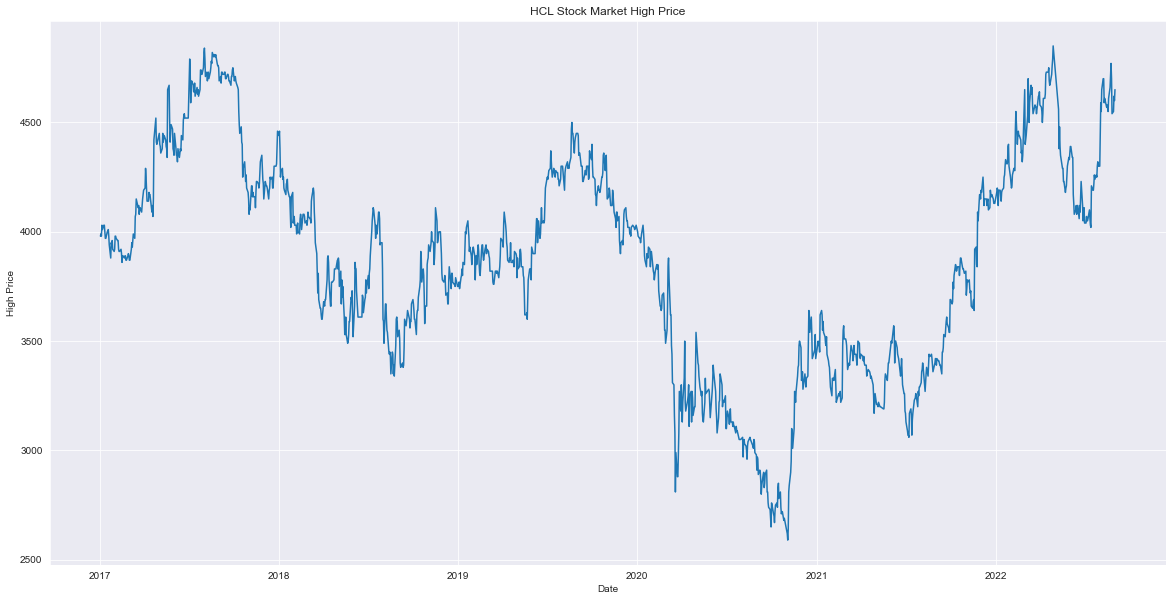

In [16]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')
plt.plot(data['High'])

## Uji Stasioneritas Data

In [17]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    datatest = adfuller(timeseries, autolag='AIC')
    dataoutput = pd.Series(datatest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in datatest[4].items():
        dataoutput['Critical Value (%s)'%key] = value
    print(dataoutput)

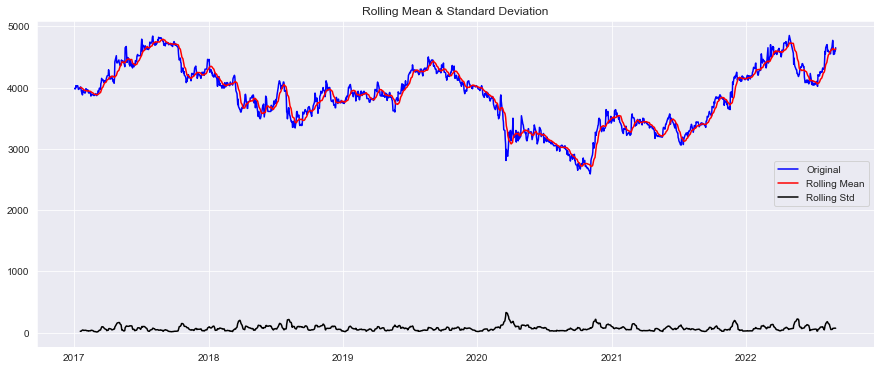

Results of Dickey-Fuller Test:
Test Statistic                   -1.775556
p-value                           0.392663
#Lags Used                        2.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [18]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value < 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner.

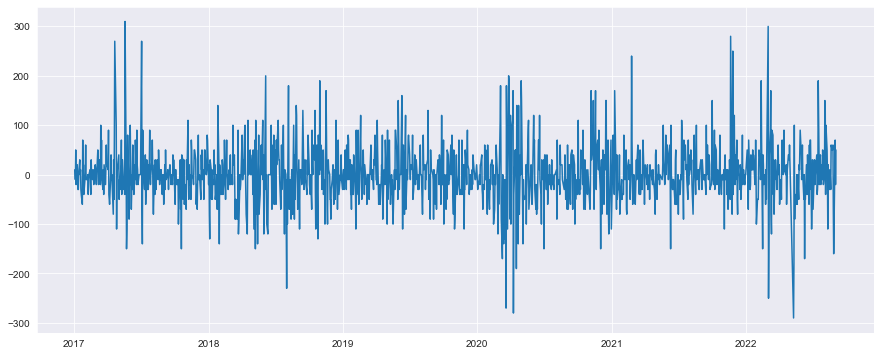

In [19]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

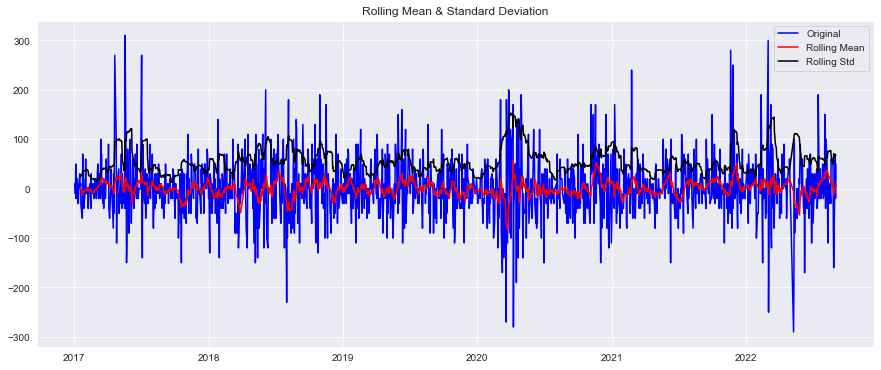

Results of Dickey-Fuller Test:
Test Statistic                  -29.891562
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [20]:
test_stationarity(ts_diff_1)

C:\Users\ayuim\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


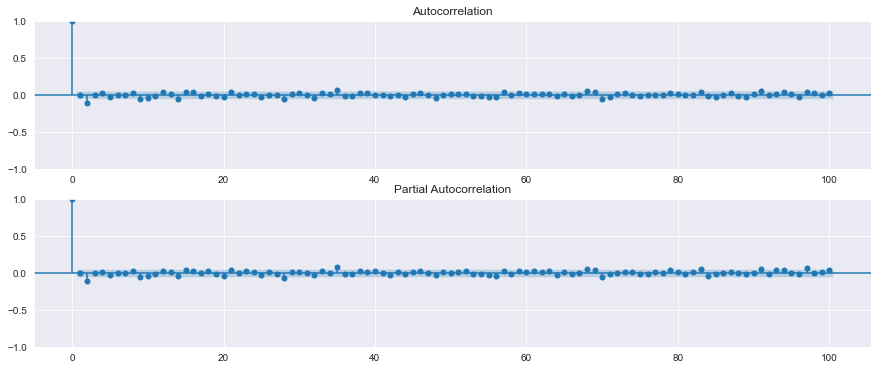

In [21]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> MODEL DAN PARAMETER <span style="color: #000000">

In [22]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [23]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=497.556
ARIMA(0, 0, 1) RMSE=269.975
ARIMA(0, 1, 0) RMSE=61.292
ARIMA(0, 1, 1) RMSE=61.394
ARIMA(1, 0, 0) RMSE=61.299
ARIMA(1, 0, 1) RMSE=61.405
ARIMA(1, 1, 0) RMSE=61.373
ARIMA(1, 1, 1) RMSE=61.599
Best ARIMA(0, 1, 0) RMSE=61.292


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 1
- orde d = 0 dan 1
- orde q = 0 dan 1

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (0,1,0).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 dan dataset telah mengalami 1x proses differencing.

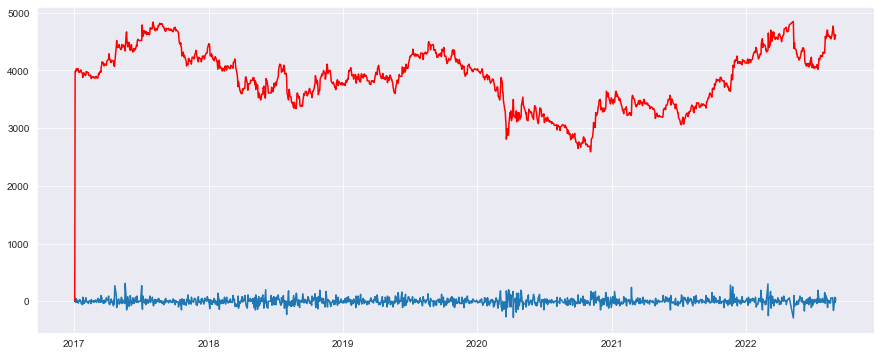

In [24]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(1,1,1)
model_ARIMA = ARIMA(ts, order=(0,1,0))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

In [25]:
#Informasi yang diperoleh dari pemodelan ARIMA(0,1,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1421
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7831.233
Date:                Sat, 17 Sep 2022   AIC                          15664.466
Time:                        20:08:31   BIC                          15669.724
Sample:                             0   HQIC                         15666.430
                               - 1421                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3612.0431     80.925     44.634      0.000    3453.433    3770.653
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               799.15
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.37
Prob(H) (two-sided):                  0.37   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> PREDIKSI DATA <span style="color: #000000"> 

In [26]:
#Prediksi data dengan model ARIMA(0,1,0) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1328,end=1331)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

Date
2022-04-11     9260.0
2022-04-12    18480.0
2022-04-13    32330.0
2022-04-14    50900.0
dtype: float64


<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b> KESIMPULAN <span style="color: #000000"> 

Berdasarkan Prediksi Saham PT Telkom Indonesia dengan menggunakan metode ARIMA 
Diperoleh hasil prediksi untuk nilai harga tertinggi saham TELKOM pada periode tanggal :
- 11 April 2022 =  9260.0
- 12 April 2022 = 18480.0
- 13 April 2022 = 32330.0
- 14 April 2022 = 50900.0